## Web scrapping
2. Do the same analysis with another book shop like <https://www.buscalibre.es/libros/computacion>.

In [29]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
url = 'https://www.buscalibre.es/libros/computacion'
headers = {"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:66.0) Gecko/20100101 Firefox/66.0", "Accept-Encoding":"gzip, deflate", "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8", "DNT":"1","Connection":"close", "Upgrade-Insecure-Requests":"1"}
result = requests.get(url, headers=headers)
print('Status code:', result.status_code)

Status code: 200


In [31]:
soup = BeautifulSoup(result.text, "html.parser")
# Get the titles
all_books = soup.find_all("div",class_="box-producto")
print(f"Number of books: {len(all_books)}")
# Extract the text from each element
prices = soup.find_all("p", class_="precio-ahora")
books = soup.find_all("h3", class_="nombre")
authors = soup.select('div[class="autor"]')

# Create a list to store book information
book_list = []

# Extract the text from each element
for i, (price_now_i, book_name_i, author_name_i) in enumerate(zip(prices, books, authors), start=1):
    price = price_now_i.strong.text
    book = book_name_i.text.strip()
    author = author_name_i.text.strip()

    # Append book information to the list
    book_list.append(f"Book {i} Title: {book}\nAuthor: {author}\nCurrent Price: {price}\n")

# Write book information to a text file
with open("books_info.txt", "w", encoding="utf-8") as file:
    for book_info in book_list:
        file.write(book_info + "\n")

print("Book information saved to 'books_info.txt'.")


Number of books: 50
Book information saved to 'books_info.txt'.


In [32]:
# Initialize an empty list to store dictionaries
book_dicts = []

# Loop through each entry in the input list
for entry in book_list:
    # Extracting values
    book_info = entry.split('\n')
    book_title = book_info[0].split(': ')[1]
    author = book_info[1].split(': ')[1]
    
    # Extracting the price and removing the currency symbol
    price_str = book_info[2].split(': ')[1].replace('€', '').strip()
    # Replacing comma with dot for proper float conversion
    current_price = float(price_str.replace(',', '.'))

    # Creating dictionary for current entry
    book_dict = {
        'book': book_title,
        'author': author,
        'current_price': current_price
    }

    # Append the dictionary to the list
    book_dicts.append(book_dict)

print(book_dicts)

[{'book': 'Hábitos Atómicos', 'author': 'James Clear', 'current_price': 18.91}, {'book': 'Automatización de Procesos Industriales', 'author': 'Emilio García Moreno', 'current_price': 28.12}, {'book': 'El Pequeño Libro Para Invertir con Sentido Común', 'author': 'John C. Bogle', 'current_price': 16.1}, {'book': 'Quantum Computation and Quantum Information', 'author': 'Nielsen Michael A.', 'current_price': 68.87}, {'book': "All-New Echo dot (3Rd Generation) Beginner's User Manual", 'author': 'Pharm Ibrahim', 'current_price': 15.82}, {'book': 'Observing the User Experience', 'author': 'Elizabeth Goodman Ph.D.  School Of Information  University Of California Berkeley Dr.; Mike Kuniavsky; Andrea Moed', 'current_price': 55.8}, {'book': "A Composer's Guide to Game Music (Mit Press) (The mit Press) (en Inglés)", 'author': 'Winifred Phillips', 'current_price': 27.31}, {'book': 'Value Sensitive Design', 'author': 'Batya Friedman; David G. Hendry', 'current_price': 35.46}, {'book': 'Automating So

In [33]:
# Convert the list of dictionaries to a DataFrame
df = pd.DataFrame(book_dicts)

df.to_csv('books.csv', index=False)
df.to_json('books.json')
df.to_xml('books.xml', index=False)
df.head()

,book,author,current_price
0,Hábitos Atómicos,James Clear,18.91
1,Automatización de Procesos Industriales,Emilio García Moreno,28.12
2,El Pequeño Libro Para Invertir con Sentido Común,John C. Bogle,16.10
3,Quantum Computation and Quantum Information,Nielsen Michael A.,68.87
4,All-New Echo dot (3Rd Generation) Beginner's U...,Pharm Ibrahim,15.82


In [34]:
sorted_df = df.sort_values('current_price', ascending=False)
top_10 = sorted_df.head(10)
print(top_10)

                                                 book  \
19                      Fundamentos de Bases de Datos   
45             Quantum Information Theory (en Inglés)   
3         Quantum Computation and Quantum Information   
16                                        Programming   
23                                    Accelerated C++   
49                  Gestión de Proyectos Informáticos   
35    C Programming Language, 2nd Edition (en Inglés)   
24      implementing domain-driven design (en Inglés)   
8   Automating Solidworks 2019 Using Macros (en In...   
5                       Observing the User Experience   

                                               author  current_price  
19    Abraham Silberschatz; Henry Korth; S. Sudarshan          80.40  
45                                     Wilde, Mark M.          75.99  
3                                  Nielsen Michael A.          68.87  
16                                 Stroustrup, Bjarne          64.11  
23               

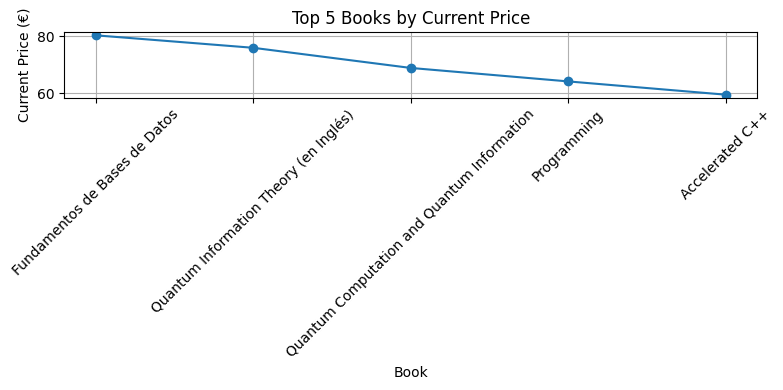

In [35]:
# Sort by 'current_price' in descending order and take the top 5
# Plotting
top_books = df.sort_values('current_price', ascending=False).head(5)
# Plotting
plt.figure(figsize=(8, 4))
plt.plot(top_books['book'], top_books['current_price'], marker='o')
plt.title('Top 5 Books by Current Price')
plt.xlabel('Book')
plt.ylabel('Current Price (€)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()  # Adjusts plot to ensure everything fits without overlapping

# Show the plot
plt.show()

## Data Analysis
1. Do the same analysis with another tabular dataset,[Titanic](https://www.kaggle.com/c/titanic/data) datasets.

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import pandas as pd
import numpy as np
from scipy.stats import normaltest, norm
import seaborn as sns

In [37]:
df = pd.read_csv('/Users/jordilazo/git/massive_data_processing_103088/data_processing/titanic.csv')
# If we want to convert integers to floats to make data uniform
int_columns = df.select_dtypes(include=['int']).columns
df[int_columns] = df[int_columns].astype(float)
df.head(5)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1.0,0.0,3.0,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.2500,NaN,S
1,2.0,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,PC 17599,71.2833,C85,C
2,3.0,1.0,3.0,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,STON/O2. 3101282,7.9250,NaN,S
3,4.0,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,C123,S
4,5.0,0.0,3.0,"Allen, Mr. William Henry",male,35.0,0.0,0.0,373450,8.0500,NaN,S


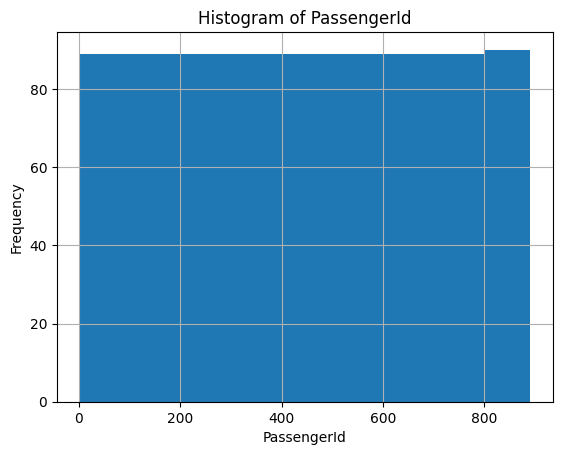

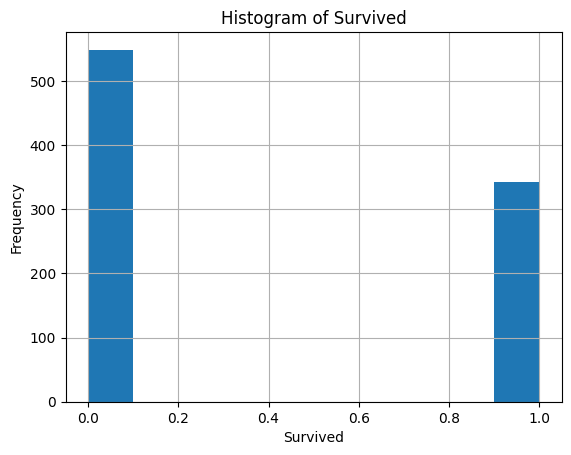

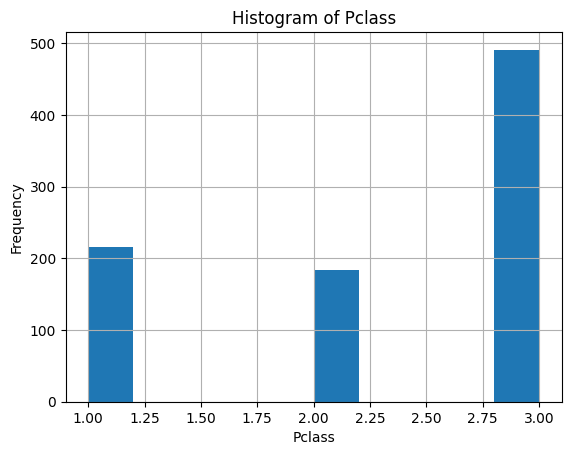

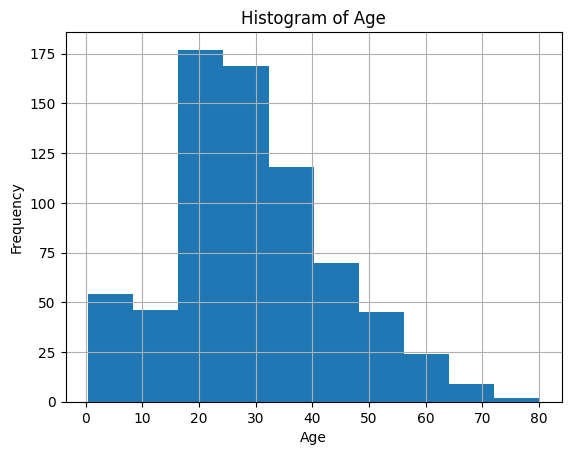

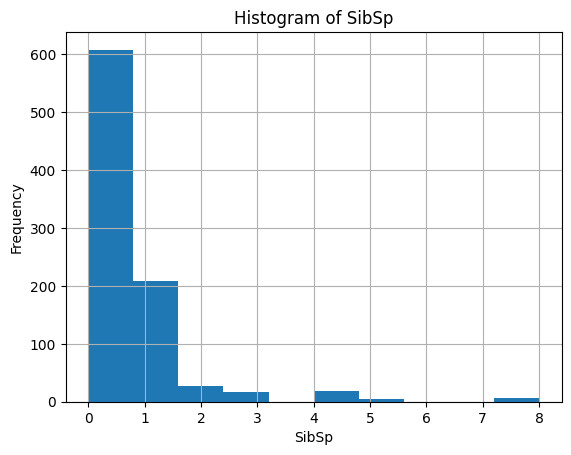

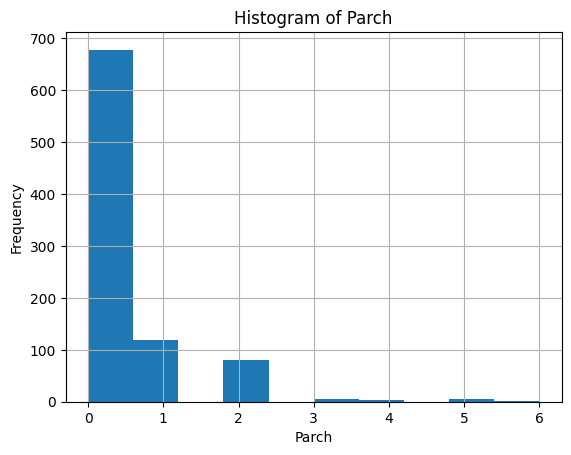

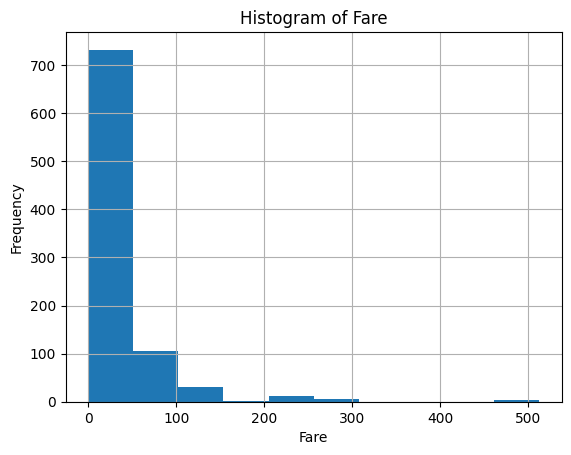

In [38]:
# Let's create histograms, one for every feature
# Create a histogram for each numeric feature
numeric_features = ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
for feature in numeric_features:
    df[feature].hist()
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

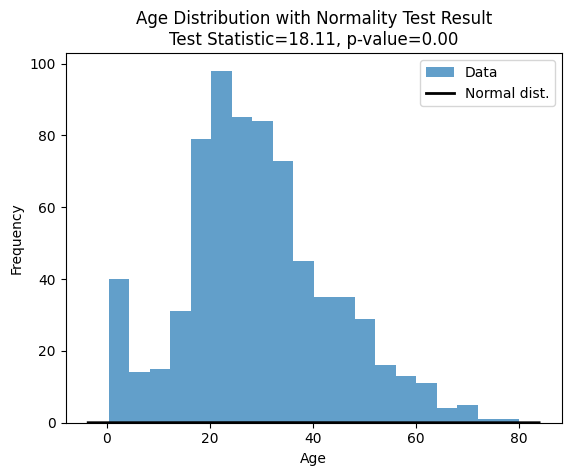

In [39]:
# Perform the normality test on a column, for example, 'Age'
statistic, p_value = normaltest(df['Age'].dropna())

# Plot the distribution of 'Age'
plt.hist(df['Age'].dropna(), bins='auto', alpha=0.7, label='Data')

# Plot the normal distribution with the same mean and standard deviation as the data
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, df['Age'].mean(), df['Age'].std())
plt.plot(x, p, 'k', linewidth=2, label='Normal dist.')

title_text = f'Age Distribution with Normality Test Result\nTest Statistic={statistic:.2f}, p-value={p_value:.2f}'
plt.title(title_text)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()

# Show the plot
plt.show()

In [40]:
# Get the descriptive statistics for all columns
description_all = df.describe(include='all')

# Print the descriptive statistics for all columns
print(description_all)

        PassengerId    Survived      Pclass                     Name   Sex  \
count    891.000000  891.000000  891.000000                      891   891   
unique          NaN         NaN         NaN                      891     2   
top             NaN         NaN         NaN  Braund, Mr. Owen Harris  male   
freq            NaN         NaN         NaN                        1   577   
mean     446.000000    0.383838    2.308642                      NaN   NaN   
std      257.353842    0.486592    0.836071                      NaN   NaN   
min        1.000000    0.000000    1.000000                      NaN   NaN   
25%      223.500000    0.000000    2.000000                      NaN   NaN   
50%      446.000000    0.000000    3.000000                      NaN   NaN   
75%      668.500000    1.000000    3.000000                      NaN   NaN   
max      891.000000    1.000000    3.000000                      NaN   NaN   

               Age       SibSp       Parch  Ticket        Fare 

In [41]:
# Select only the columns of float type
float_columns = df.select_dtypes(include=['float64']).columns
# Drop columns that are not of float type
df_floats_only = df[float_columns]

# Calculate the 25th percentile
percentile_25 = df_floats_only.quantile(0.25)

# Calculate the 50th percentile (median)
percentile_50 = df_floats_only.quantile(0.50)

# Calculate the 75th percentile
percentile_75 = df_floats_only.quantile(0.75)

# Print the percentiles
print(f"25th Percentile:\n{percentile_25}\n")
print(f"50th Percentile (Median):\n{percentile_50}\n")
print(f"75th Percentile:\n{percentile_75}\n")

25th Percentile:
PassengerId    223.5000
Survived         0.0000
Pclass           2.0000
Age             20.1250
SibSp            0.0000
Parch            0.0000
Fare             7.9104
Name: 0.25, dtype: float64

50th Percentile (Median):
PassengerId    446.0000
Survived         0.0000
Pclass           3.0000
Age             28.0000
SibSp            0.0000
Parch            0.0000
Fare            14.4542
Name: 0.5, dtype: float64

75th Percentile:
PassengerId    668.5
Survived         1.0
Pclass           3.0
Age             38.0
SibSp            1.0
Parch            0.0
Fare            31.0
Name: 0.75, dtype: float64



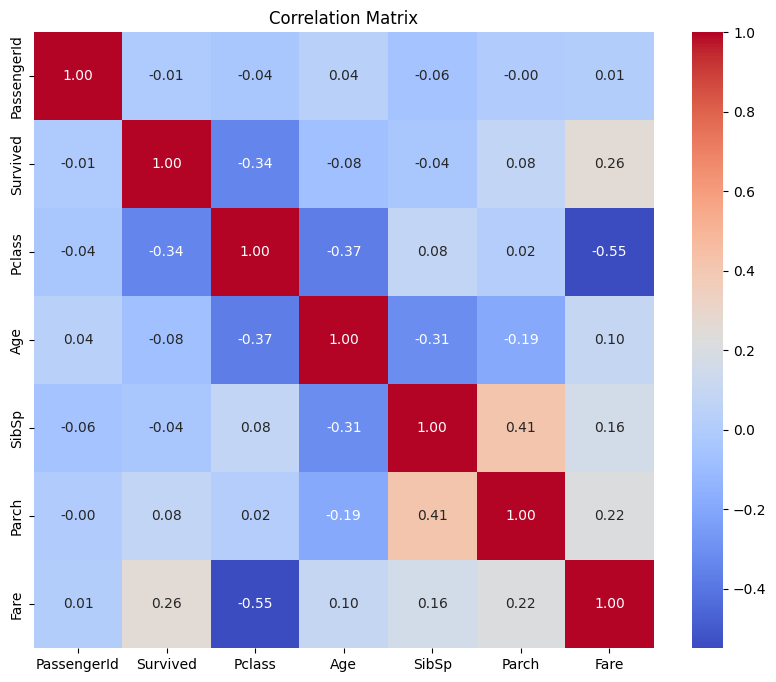

In [42]:
# Visualize the correlation matrix
correlation_matrix = df_floats_only.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


## Data Cleaning
2. Try also with another imputer: `IterativeImputer`

In [43]:
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.experimental import enable_iterative_imputer  # Explicitly enable IterativeImputer
from sklearn.impute import IterativeImputer  # Now you can import it
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

In [44]:
housing = fetch_california_housing()
print(housing.data.shape, housing.target.shape)
print(housing.feature_names)

(20640, 8) (20640,)
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [45]:
seed = 12345
rng = np.random.RandomState(seed)

# Only fetch 300 rows
X_california, y_california = fetch_california_housing(return_X_y=True)
X_california = X_california[:300]
y_california = y_california[:300]

# Let's select the rows and the columns
n_samples, n_features = X_california.shape
missing_samples = np.random.choice([True, False], size=n_samples, p=[0.75, 0.25])
missing_features = rng.randint(0, n_features, np.sum(missing_samples == True)) # low, high, size

# We fix the selected row,column to NaN
X_miss_california = X_california.copy()
X_miss_california[missing_samples, missing_features] = np.nan
y_miss_california = y_california.copy()

In [46]:
california_stats = []

def get_scores_for_imputer(imputer, X_missing, y_missing, num_folds=4):
    regressor = RandomForestRegressor(random_state=0)
    estimator = make_pipeline(imputer, regressor)
    impute_scores = cross_val_score(
        estimator, X_missing, y_missing, scoring="neg_mean_squared_error", cv=num_folds
    )
    return impute_scores.mean(), impute_scores.std()

In [47]:
def get_full_score(X_full, y_full, num_folds=4):
    regressor = RandomForestRegressor(random_state=0)
    full_scores = cross_val_score(
        regressor, X_full, y_full, scoring="neg_mean_squared_error", cv=num_folds
    )
    return full_scores.mean(), full_scores.std()

mean, std = get_full_score(X_california, y_california)
california_stats.append( (mean, std, "Full data") )

In [48]:
def get_impute_zero_score(X_missing, y_missing):
    imputer = SimpleImputer(
        missing_values=np.nan, add_indicator=True, strategy="constant", fill_value=0
    )
    return get_scores_for_imputer(imputer, X_missing, y_missing)

mean, std = get_impute_zero_score(X_miss_california, y_miss_california)
california_stats.append( (mean, std, "Zero Imputation") )

In [49]:
def get_impute_knn_score(X_missing, y_missing):
    imputer = KNNImputer(missing_values=np.nan, add_indicator=True)
    return get_scores_for_imputer(imputer, X_missing, y_missing)

mean, std = get_impute_knn_score(X_miss_california, y_miss_california)
california_stats.append( (mean, std, "KNN Imputation") )

In [50]:
def get_impute_mean(X_missing, y_missing):
    imputer = SimpleImputer(missing_values=np.nan, strategy="mean", add_indicator=True)
    return get_scores_for_imputer(imputer, X_missing, y_missing)

mean, std = get_impute_mean(X_miss_california, y_miss_california)
california_stats.append( (mean, std, "Mean Imputation") )

In [51]:
def get_impute_iterative_score(X_missing, y_missing):
    imputer = IterativeImputer(missing_values=np.nan, add_indicator=True, random_state=0)
    return get_scores_for_imputer(imputer, X_missing, y_missing)

mean, std = get_impute_iterative_score(X_miss_california, y_miss_california)
california_stats.append( (mean, std, "Iterative Imputation") )

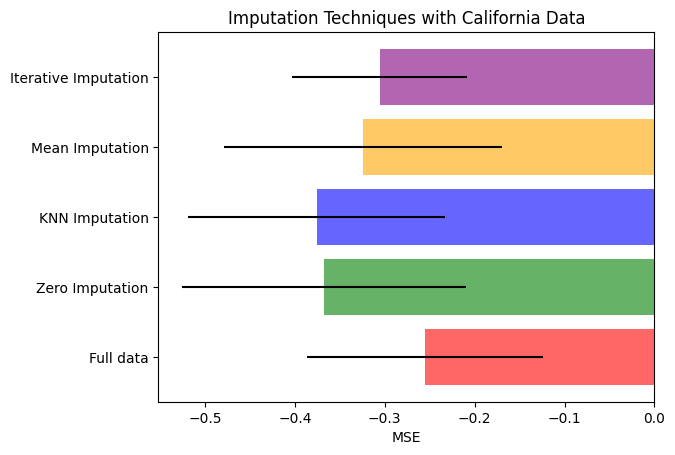

In [52]:
colors = ["r", "g", "b", "orange", "purple"]

for x, stats in enumerate(california_stats):
    plt.barh(x, stats[0], xerr=stats[1], color=colors[x], alpha=0.6, align="center")

plt.title("Imputation Techniques with California Data")
plt.yticks(range(len(california_stats)), [x[2] for x in california_stats])
plt.xlabel("MSE")

plt.show()